<a href="https://www.kaggle.com/code/diptinagvekar/house-sale-price-prediction?scriptVersionId=128320791" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# Importing packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read data
house_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house_df.shape

(1460, 81)

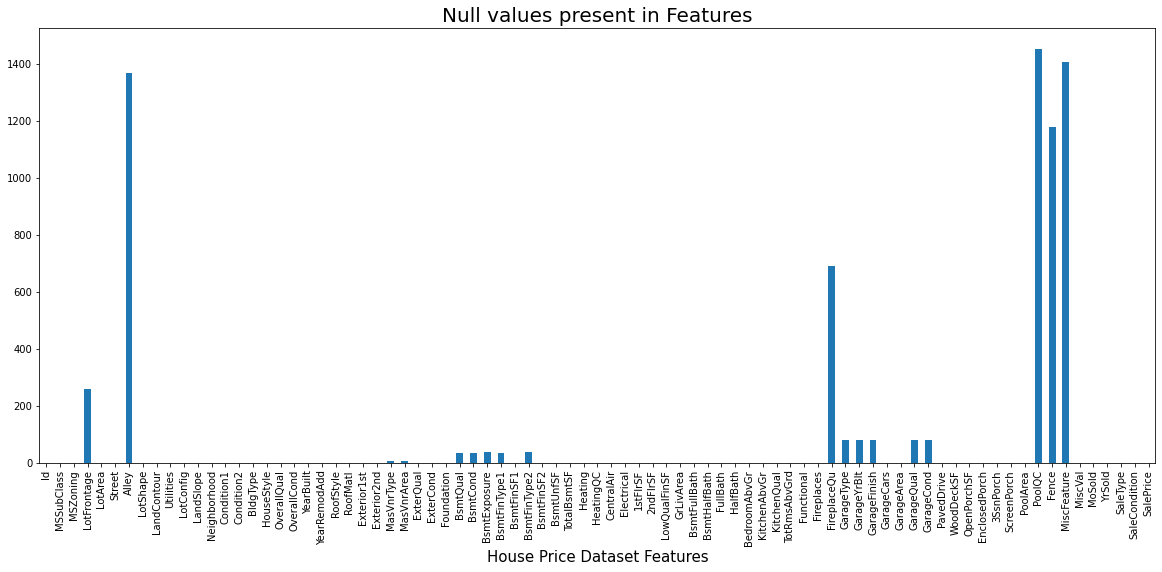

In [4]:
# Graphical representation of missing data:

plt.figure(figsize=(20,8))
house_df.isnull().sum().plot(kind='bar');
plt.title('Null values present in Features', fontsize=20);
plt.xlabel("House Price Dataset Features", fontsize=15);

In [5]:
# Features which contain null values:

house_df.isnull().sum()[house_df.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

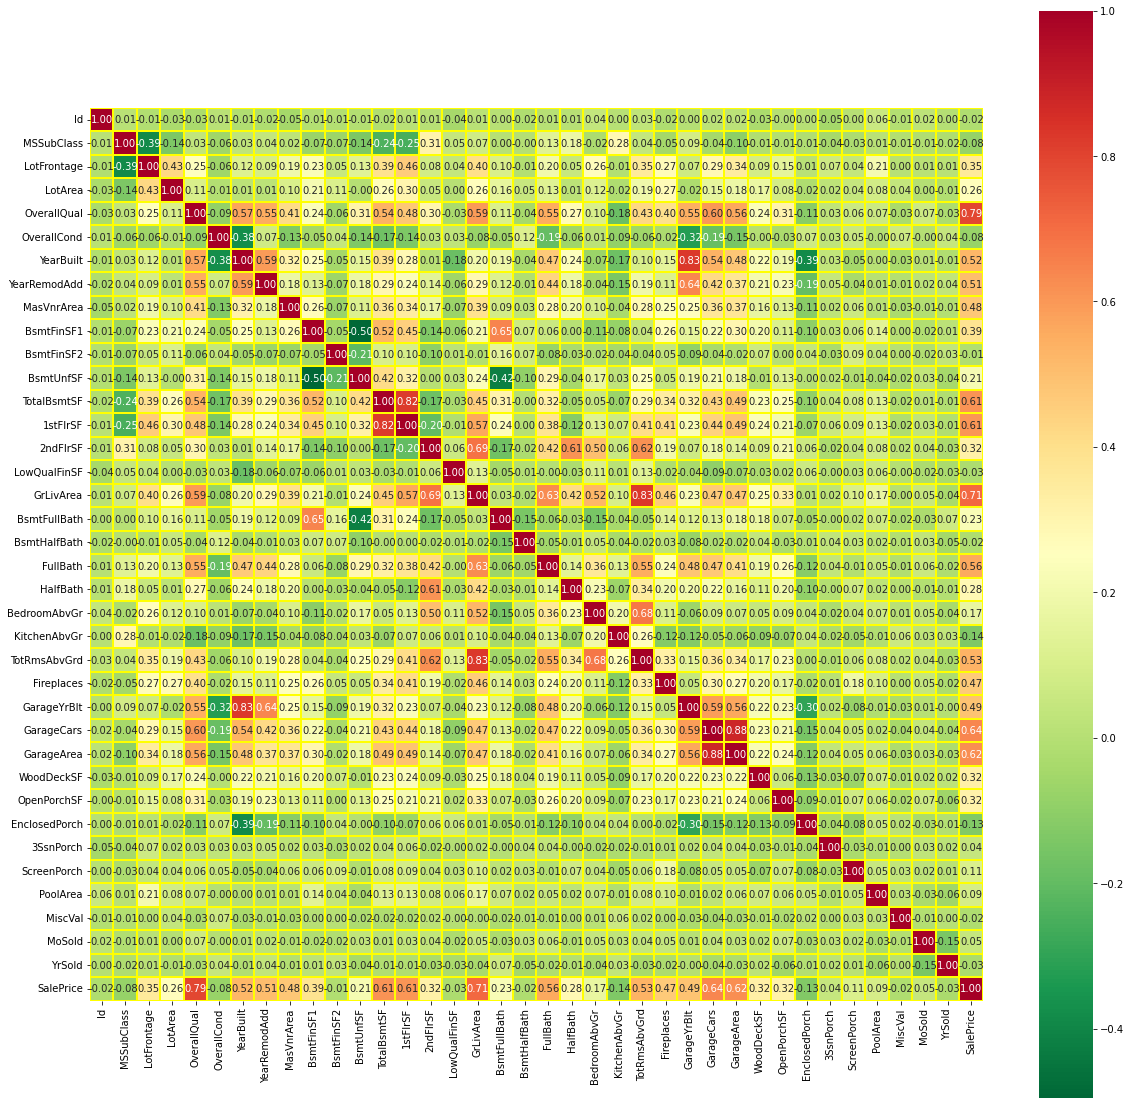

In [6]:
# Correlation between the features:

corr_mat = house_df.corr()
fig, ax = plt.subplots(figsize=(20,20))        
sns.heatmap(corr_mat, 
            annot=True, 
            fmt='.2f',
            square=True,
            linewidths=0.3,
            cmap='RdYlGn_r',
            linecolor='yellow');

### **Data Manipulation:**

In [7]:
# Dropping the columns from dataset which have higher missing data:

house_df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [8]:
# Splitting dataset into X and y sets:

features = ['LotArea', 'Utilities', 'OverallQual', 'OverallCond', 'GrLivArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
            '1stFlrSF', '2ndFlrSF', 'PoolArea', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd','GarageCars', 'GarageArea', 'GarageQual']

X = house_df[features]
y = house_df.SalePrice
X.shape, y.shape

((1460, 17), (1460,))

In [9]:
X.head()

,LotArea,Utilities,OverallQual,OverallCond,GrLivArea,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,PoolArea,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,GarageQual
0,8450,AllPub,7,5,1710,2003,2003,856,856,854,0,2,3,8,2,548,TA
1,9600,AllPub,6,8,1262,1976,1976,1262,1262,0,0,2,3,6,2,460,TA
2,11250,AllPub,7,5,1786,2001,2002,920,920,866,0,2,3,6,2,608,TA
3,9550,AllPub,7,5,1717,1915,1970,756,961,756,0,1,3,7,3,642,TA
4,14260,AllPub,8,5,2198,2000,2000,1145,1145,1053,0,2,4,9,3,836,TA


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotArea       1460 non-null   int64 
 1   Utilities     1460 non-null   object
 2   OverallQual   1460 non-null   int64 
 3   OverallCond   1460 non-null   int64 
 4   GrLivArea     1460 non-null   int64 
 5   YearBuilt     1460 non-null   int64 
 6   YearRemodAdd  1460 non-null   int64 
 7   TotalBsmtSF   1460 non-null   int64 
 8   1stFlrSF      1460 non-null   int64 
 9   2ndFlrSF      1460 non-null   int64 
 10  PoolArea      1460 non-null   int64 
 11  FullBath      1460 non-null   int64 
 12  BedroomAbvGr  1460 non-null   int64 
 13  TotRmsAbvGrd  1460 non-null   int64 
 14  GarageCars    1460 non-null   int64 
 15  GarageArea    1460 non-null   int64 
 16  GarageQual    1379 non-null   object
dtypes: int64(15), object(2)
memory usage: 194.0+ KB


In [11]:
# Missing value present in the dataset:
X.isnull().sum()

LotArea          0
Utilities        0
OverallQual      0
OverallCond      0
GrLivArea        0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
PoolArea         0
FullBath         0
BedroomAbvGr     0
TotRmsAbvGrd     0
GarageCars       0
GarageArea       0
GarageQual      81
dtype: int64

In [12]:
X.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [13]:
# Function to calculate the Evaluation metrics:

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    r2 = r2_score(y_true, y_preds)
    mae = mean_absolute_error(y_true, y_preds)
    mse = mean_squared_error(y_true, y_preds)
    metric_dict = {"r2_score": round(r2, 5),
                   "Mean Absolute Error": round(mae, 4), 
                   "Mean Squared Error": round(mse, 4)}
    return metric_dict

<h3> Random Forest Regressor</h3>

In [14]:
# Training a model with Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


# Categorical Features
cat_features = ['Utilities', 'GarageQual']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))
])

# Numerical Features
num_features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 
                '2ndFlrSF', 'PoolArea', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, cat_features),
    ('num', numerical_transformer, num_features)
])

# Create a preprocessing and modelling pipeline
model_reg = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model_reg", RandomForestRegressor(n_jobs=1, random_state=42))])


# Splitting the data into train and test dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fiiting dataset into the model:
model_reg.fit(X_train, y_train)
y_pred = model_reg.predict(X_test)


In [15]:
# Baseline Metrics of trained model: 

rf_baseline_metrics= evaluate_preds(y_test, y_pred)
rf_baseline_metrics

{'r2_score': 0.88619,
 'Mean Absolute Error': 18176.7454,
 'Mean Squared Error': 872981253.2931}

<h2> XGBoost: </h2>

In [16]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

model_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model_xgb', XGBRegressor(n_jobs=1, random_state=42))])

model_xgb.fit(X_train,y_train)
y_xgb_pred = model_xgb.predict(X_test)

In [17]:
xgb_basline_metrics= evaluate_preds(y_test, y_xgb_pred)
xgb_basline_metrics

{'r2_score': 0.90285,
 'Mean Absolute Error': 17950.7873,
 'Mean Squared Error': 745152220.5438}

The performabnce XGBoost is better than Random Forest Regressor as it gives accuracy: 90.28%.

Next, lets use Hyperparameter tuning on the XGBoost model to increase its performance.

### Hyperparameter Tuning on XGBoost model:

In [18]:
# Hyperparameter Tuning the XGBoost model using GridSearchCV method:

np.random.seed(42)
grid_xgb={'model_xgb__max_depth': [5,6,7],
          'model_xgb__learning_rate': [0.01, 0.02],
          'model_xgb__n_estimators': [500,700],
          'model_xgb__colsample_bytree': np.arange(0.3, 0.5, 0.1),
          'model_xgb__colsample_bylevel': np.arange(0.3, 0.5, 0.1)}

from sklearn.model_selection import GridSearchCV
gs_xgb = GridSearchCV(estimator=model_xgb,
                            param_grid=grid_xgb,
                            scoring='neg_mean_squared_error',
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results
                            
# Fit the GridSeacrhCV version of XGBoost:
gs_xgb.fit(X_train, y_train);

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END model_xgb__colsample_bylevel=0.3, model_xgb__colsample_bytree=0.3, model_xgb__learning_rate=0.01, model_xgb__max_depth=5, model_xgb__n_estimators=500; total time=   1.9s
[CV] END model_xgb__colsample_bylevel=0.3, model_xgb__colsample_bytree=0.3, model_xgb__learning_rate=0.01, model_xgb__max_depth=5, model_xgb__n_estimators=500; total time=   1.8s
[CV] END model_xgb__colsample_bylevel=0.3, model_xgb__colsample_bytree=0.3, model_xgb__learning_rate=0.01, model_xgb__max_depth=5, model_xgb__n_estimators=500; total time=   1.7s
[CV] END model_xgb__colsample_bylevel=0.3, model_xgb__colsample_bytree=0.3, model_xgb__learning_rate=0.01, model_xgb__max_depth=5, model_xgb__n_estimators=500; total time=   1.8s
[CV] END model_xgb__colsample_bylevel=0.3, model_xgb__colsample_bytree=0.3, model_xgb__learning_rate=0.01, model_xgb__max_depth=5, model_xgb__n_estimators=500; total time=   1.8s
[CV] END model_xgb__colsample_bylevel=0.3, 

In [19]:
gs_xgb.best_params_

{'model_xgb__colsample_bylevel': 0.3,
 'model_xgb__colsample_bytree': 0.4,
 'model_xgb__learning_rate': 0.02,
 'model_xgb__max_depth': 6,
 'model_xgb__n_estimators': 700}

In [20]:
# Max predictions with the GridSearchCV classifier
xgb_y_preds = gs_xgb.predict(X_test)

# Evaluate the predictions
xgb_metrics = evaluate_preds(y_test, xgb_y_preds)
xgb_metrics

{'r2_score': 0.9037,
 'Mean Absolute Error': 17586.7982,
 'Mean Squared Error': 738630791.5978}

In [21]:
xgb_basline_metrics

{'r2_score': 0.90285,
 'Mean Absolute Error': 17950.7873,
 'Mean Squared Error': 745152220.5438}

### Predict the Sale Price using the Hyperparameter Tuned XGBoost Model:

In [22]:
# Read the test data:

test_df= pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [23]:
test_X = test_df[features]
test_X.head()

,LotArea,Utilities,OverallQual,OverallCond,GrLivArea,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,PoolArea,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,GarageQual
0,11622,AllPub,5,6,896,1961,1961,882.0,896,0,0,1,2,5,1.0,730.0,TA
1,14267,AllPub,6,6,1329,1958,1958,1329.0,1329,0,0,1,3,6,1.0,312.0,TA
2,13830,AllPub,5,5,1629,1997,1998,928.0,928,701,0,2,3,6,2.0,482.0,TA
3,9978,AllPub,6,6,1604,1998,1998,926.0,926,678,0,2,3,7,2.0,470.0,TA
4,5005,AllPub,8,5,1280,1992,1992,1280.0,1280,0,0,2,2,5,2.0,506.0,TA


In [24]:
test_X.isnull().sum()

LotArea          0
Utilities        2
OverallQual      0
OverallCond      0
GrLivArea        0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      1
1stFlrSF         0
2ndFlrSF         0
PoolArea         0
FullBath         0
BedroomAbvGr     0
TotRmsAbvGrd     0
GarageCars       1
GarageArea       1
GarageQual      78
dtype: int64

In [25]:
# Predict the SalePrice of the Houses: 

test_preds = gs_xgb.predict(test_X)
test_preds[:5]

array([133619.84, 162760.1 , 178161.2 , 185833.12, 204987.44],
      dtype=float32)

In [26]:
output_data = pd.DataFrame({'Id':test_df.Id,
                            'SalePrice': test_preds
                           })
output_data.to_csv('submission.csv',index=False)